In [1]:
# Function to get e and H given T in celsius and dewpoint also in celsius

def get_e(td):
    e = 6.11*np.exp(5417.7530*((1/273.16) - 1/(td+0.01)))
    return e

def get_humidex(T,td):
    H = T + (0.5555*(get_e(td) - 10))
    return H

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('default')

In [4]:
data = pd.read_csv("DATA111_V0.csv", encoding='latin-1')

In [5]:
data.head()

,COD,YEAR,DAY365,MINUTE2400,N_WNDVEL_5M,N_WNDVEL_2M,N_WNDDIR_DEGREE,N_INCRAD_10MSR,N_REFRAD_10MSR,N_PHTFLOW_10MSR,...,N_AIRMTR_PCT10,N_AIRTMP_MED10,N_GRDTMP_3CM,N_GRDTMP_6CM,N_GRDTMP_UV,N_PRESSION_HPA,N_RAIN_SUM10,month,week,C_WNDDIR_DEGREE
0,111.0,1997.0,1.0,10.0,1618.00,1115.000,8.32,0.0,0.0,0.0,...,92.3,19.84,21.04,22.68,24.59,943.0,0.0,1,0.0,N
1,111.0,1997.0,1.0,20.0,0.99,0.763,20.59,0.0,0.0,0.0,...,93.1,19.63,20.97,22.65,24.52,943.0,0.0,1,0.0,NNE
2,111.0,1997.0,1.0,30.0,2.05,1115.000,17.72,0.0,0.0,0.0,...,93.9,19.42,20.88,22.51,24.38,943.0,0.0,1,0.0,NNE
3,111.0,1997.0,1.0,40.0,3089.00,1422.000,189.20,0.0,0.0,0.0,...,94.4,19.42,20.79,22.43,24.30,943.0,0.0,1,0.0,S
4,111.0,1997.0,1.0,50.0,2128.00,1406.000,153.20,0.0,0.0,0.0,...,94.0,19.41,20.69,22.28,24.24,943.0,0.0,1,0.0,SSE


In [6]:
# getting Tdew for max,mean and min temperatures all of them with the relative humidty of the day
def get_td(t,hr):
    td = t - (100-hr)/5
    return td

data['td1'] = get_td(data['N_AIRTMP_MED10'],data['N_AIRMTR_PCT10'])

In [7]:
data['h1'] = get_humidex(data['N_AIRTMP_MED10'],data['td1'])

c:\users\hideki\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


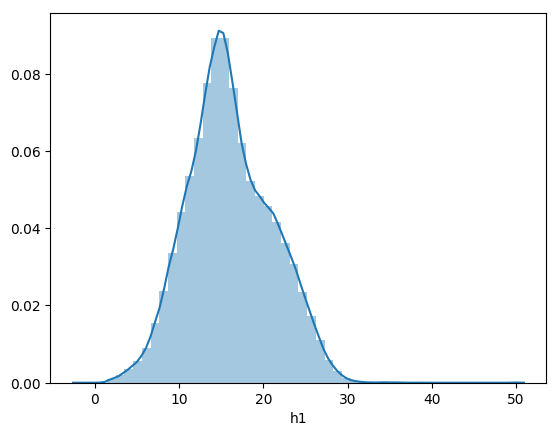

In [8]:
data.loc[data['h1'] > 60 , 'h1'] = 50
sns.distplot(data['h1'])

In [9]:
data[(data['h1'] <40)&(data['h1'] >= 35)]

,COD,YEAR,DAY365,MINUTE2400,N_WNDVEL_5M,N_WNDVEL_2M,N_WNDDIR_DEGREE,N_INCRAD_10MSR,N_REFRAD_10MSR,N_PHTFLOW_10MSR,...,N_GRDTMP_3CM,N_GRDTMP_6CM,N_GRDTMP_UV,N_PRESSION_HPA,N_RAIN_SUM10,month,week,C_WNDDIR_DEGREE,td1,h1
33759,111.0,1997.0,316.0,130.0,3207.000,2218.000,185.40,0.000,0.000,0.0,...,48.75,50.09,51.66,970.0,0.0,11,45.0,S,40.700,35.925
33760,111.0,1997.0,316.0,140.0,2246.000,1697.000,7.11,0.000,0.000,0.0,...,48.89,50.27,51.75,970.0,0.0,11,45.0,N,40.950,36.175
33761,111.0,1997.0,316.0,150.0,0.951,0.916,121.40,0.000,0.000,0.0,...,49.17,50.46,51.94,970.0,0.0,11,45.0,ESE,41.250,36.115
33762,111.0,1997.0,316.0,200.0,1363.000,1054.000,111.10,0.000,0.000,0.0,...,49.37,50.62,52.10,971.0,0.0,11,45.0,ESE,41.430,36.135
33763,111.0,1997.0,316.0,210.0,1991.000,1483.000,7.53,0.000,0.000,0.0,...,49.52,50.82,52.38,971.0,0.0,11,45.0,N,41.900,36.365
33764,111.0,1997.0,316.0,230.0,2697.000,1774.000,338.40,0.000,0.000,0.0,...,49.88,51.18,52.75,972.0,0.0,11,45.0,NNW,41.670,36.115
33765,111.0,1997.0,316.0,240.0,0.873,0.809,22.58,0.000,0.000,0.0,...,50.08,51.34,52.82,973.0,0.0,11,45.0,NNE,41.720,36.165
33766,111.0,1997.0,316.0,250.0,0.873,0.763,302.80,0.000,0.000,0.0,...,50.25,51.51,53.03,974.0,0.0,11,45.0,WNW,41.820,36.265
33767,111.0,1997.0,316.0,300.0,1147.000,0.886,293.80,0.000,0.000,0.0,...,50.48,51.79,53.31,974.0,0.0,11,45.0,WNW,41.940,36.385
33768,111.0,1997.0,316.0,310.0,1442.000,0.978,30.82,0.000,0.000,0.0,...,50.85,51.98,53.45,975.0,0.0,11,45.0,NNE,42.120,36.565


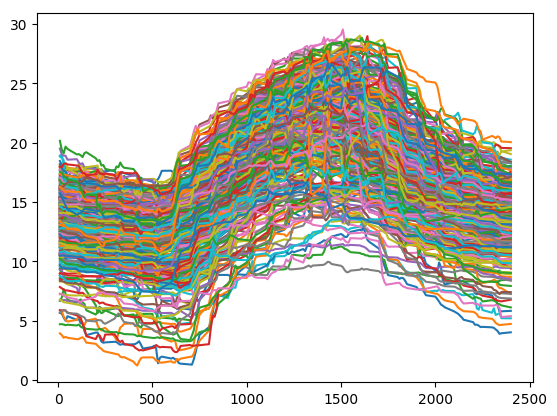

In [10]:
# Example 1 dia

year = 2018
day = 133

for i in data[data.YEAR == year]['DAY365'].unique():
    example = data[(data['YEAR'] == year) & (data['DAY365'] == i)]

    plt.plot(example['MINUTE2400'], example['h1'])

plt.show()

In [11]:
from mpl_toolkits import mplot3d

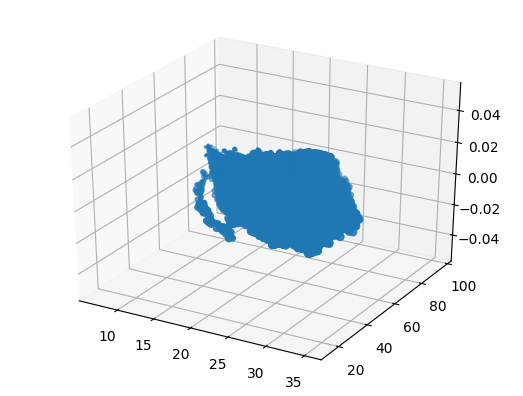

In [12]:
year = 2018
example = data[(data['YEAR'] == year) ]

fig = plt.figure()
ax = plt.axes(projection='3d')

plt.scatter(example['N_AIRTMP_MED10'],example['N_AIRMTR_PCT10'],example['h1'])